# Shreyans Murkute- E20CSE415

### Assignment 9.2.2

In [1]:
import pandas as pd

In [6]:
df= pd.read_csv('bank_churn.csv')

In [11]:
df= df.iloc[:, 1:]

In [13]:
df.shape

(10000, 11)

In [14]:
df.head(10)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [15]:
print("List Of Columns", list(df.columns))

List Of Columns ['credit_score', 'country', 'gender', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']


In [16]:
df.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
lab_enc= LabelEncoder()

In [20]:
print(df.dtypes)
#Country and Gender are Categorical

credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object


In [30]:
from sklearn.preprocessing import MinMaxScaler
X= df.iloc[:, :-1]
y= df.iloc[:, -1]
import numpy as np
mm_scaler= MinMaxScaler()
for k in X.columns:
    if X[k].dtype== 'object':
        X[k]= lab_enc.fit_transform(np.array(X[k]).reshape(-1, 1))
    else:
        X[k]= mm_scaler.fit_transform(np.array(X[k]).reshape(-1, 1))

In [32]:
from sklearn.model_selection import train_test_split
Xtrain, xtest, Ytrain, ytest= train_test_split(X, y, test_size= 0.2)

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
grad_boost= GradientBoostingClassifier()
grad_boost.fit(Xtrain, Ytrain)

GradientBoostingClassifier()

For Learning Rate:  0.05
0.8575
[[1556  247]
 [  38  159]]
(array([0.9761606 , 0.39162562]), array([0.8630061, 0.8071066]), array([0.91610244, 0.52736318]), array([1803,  197], dtype=int64))
AUC Score 0.8503238746283786



For Learning Rate:  0.1
0.865
[[1553  229]
 [  41  177]]
(array([0.97427854, 0.43596059]), array([0.8714927 , 0.81192661]), array([0.9200237 , 0.56730769]), array([1782,  218], dtype=int64))
AUC Score 0.8539064286641408



For Learning Rate:  0.25
0.863
[[1542  222]
 [  52  184]]
(array([0.96737767, 0.45320197]), array([0.87414966, 0.77966102]), array([0.91840381, 0.57320872]), array([1764,  236], dtype=int64))
AUC Score 0.8496903412427145



For Learning Rate:  0.5
0.8575
[[1519  210]
 [  75  196]]
(array([0.95294856, 0.48275862]), array([0.87854251, 0.72324723]), array([0.91423413, 0.57902511]), array([1729,  271], dtype=int64))
AUC Score 0.848511351064027



For Learning Rate:  0.75
0.845
[[1492  208]
 [ 102  198]]
(array([0.93601004, 0.48768473]), array([0.877647

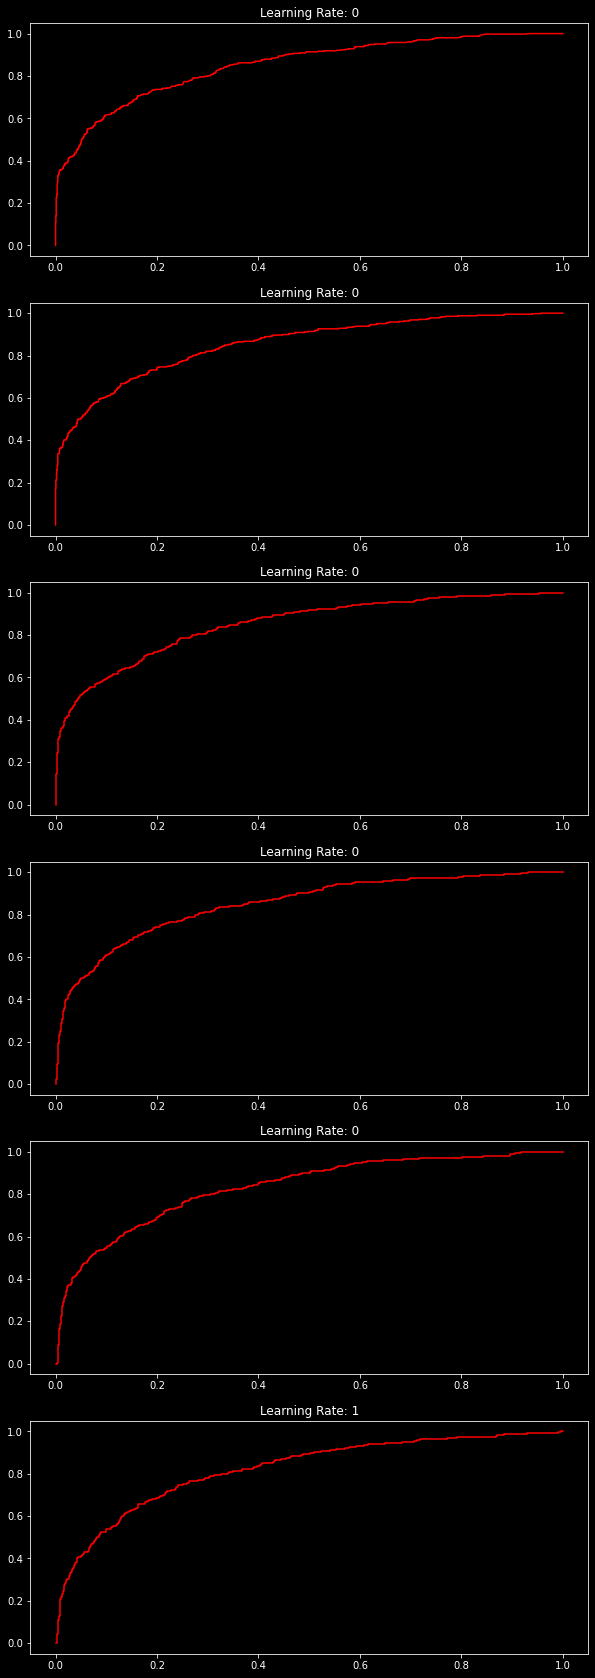

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
plt.style.use('dark_background')
params= [0.05, 0.1, 0.25, 0.5, 0.75, 1]
fig, axes= plt.subplots(len(params), 1, figsize= (10, 30))
ind= 0
for k in params:
    grad_model= GradientBoostingClassifier(learning_rate= k)
    grad_model.fit(Xtrain, Ytrain)
    preds= grad_model.predict(xtest)
    print("For Learning Rate: ", k)
    print(accuracy_score(preds, ytest))
    print(confusion_matrix(preds, ytest))
    print(precision_recall_fscore_support(preds, ytest))
    fpr, tpr, thresholds = roc_curve(ytest, grad_model.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    print("AUC Score", roc_auc)
    axes[ind].plot(fpr, tpr, 'r-')
    axes[ind].set_title("Learning Rate: %d"%k)
    ind+=1
    print(end= '\n\n\n')

In [40]:
grid_model.fit(X, y)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.25, 0.5, 0.75, 1]},
             scoring='accuracy', verbose=3)

In [45]:
grid_model.best_estimator_

GradientBoostingClassifier()